# Attributions for off-the-shelf Siamese Encoders - Demo

In [1]:
import torch
from sentence_transformers.models import Pooling
from xsbert import models, utils

c:\Study@Stutt\5@stutt\code\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### loading off-the-shelf model

You can load off-the-shelf models from huggingface, initialize them as sentence transformers and wrap them with our explainer models to compute attributions for them. We currently support MP-Net (`models.XSMPNet`) and RoBERTa (`models.XSRoberta`) architectures.

In [2]:
transformer = models.ReferenceTransformer('sentence-transformers/all-mpnet-base-v2')
pooling = Pooling(transformer.get_word_embedding_dimension())
model = models.XSMPNet(modules=[transformer, pooling])
model.to(torch.device('cuda'))

c:\Study@Stutt\5@stutt\code\.venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Study@Stutt\5@stutt\code\.venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


XSMPNet(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

### initializing attributions

The `init_attribution_to_layer()` method of the `models.XSTransformer` class initializes attributions to the layer with index `idx`. `N_steps` is the number of approximation steps to calculate the *integrated Jacobians* ($N$ in the paper).

`reset_attribution()` removes all hooks that are registered on the model for calculating attributions. After calling it, you can initialize attributions to a different layer.

In [3]:
model.reset_attribution()
model.init_attribution_to_layer(idx=10, N_steps=50)

### computing attributions

In this demo we compute the attribution matrix for a single pair of texts that you can define here:

In [4]:
texta = 'The dog runs after the kitten in the yard.'
textb = 'Outside in the garden the cat is chased by the dog.'

After initializing attributions (above), we use the method `attribute_prediction` in the `models.XSTransformer` class to compute the attribution matrix $A$.

In [10]:
A, tokens_a, tokens_b = model.explain_similarity(
    texta, 
    textb, 
    move_to_cpu=False,
    sim_measure='cos',
)

100%|██████████| 768/768 [00:04<00:00, 191.33it/s]


### plotting attributions

Finally, we can plot the token-token attribution matrix.

C:\Users\Adon\AppData\Local\Temp\ipykernel_25196\1215509648.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


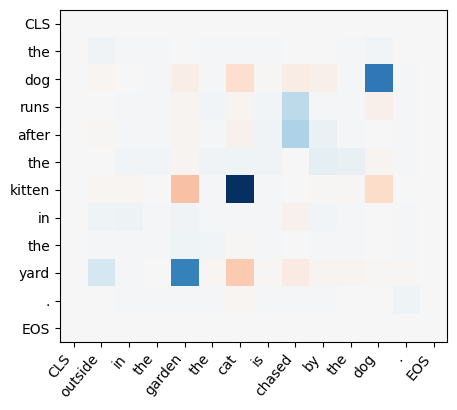

In [9]:
f = utils.plot_attributions(
    A, 
    tokens_a, 
    tokens_b, 
    size=(5, 5),
    # range=.3,
    #show_colobar=True, 
    #shrink_cbar=.5
)
f.show()